# Lab 6: Moving Beyond Linearity

## Section 7.9; Problem 9

In [1]:
library(MASS)
attach(Boston)

In [2]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

__a.__ Create a cubic polynomial regression to predict ```nox``` using ```dis```.

In [3]:
fit.3 = lm(nox~poly(dis, 3), data=Boston)

In [4]:
summary(fit.3)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


The following returnsthe estimated values for:
$$ nox \approx \beta_0 + \beta_1*dis^1 + \beta_2*dis^2 + \beta_3*dis^3 $$
However, we did not set ```raw=TRUE```, so the values that we are given for our coefficients are actually a basis of orthogonal polynmials (i.e: each column is a linear combination of the variables $dis$, $dis^2$, ...)

If we DID set raw=TRUE, we get:

In [5]:
fit.3.raw = lm(nox~poly(dis, 3, raw=TRUE), data=Boston)
summary(fit.3.raw)


Call:
lm(formula = nox ~ poly(dis, 3, raw = TRUE), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.9341281  0.0207076  45.110  < 2e-16 ***
poly(dis, 3, raw = TRUE)1 -0.1820817  0.0146973 -12.389  < 2e-16 ***
poly(dis, 3, raw = TRUE)2  0.0219277  0.0029329   7.476 3.43e-13 ***
poly(dis, 3, raw = TRUE)3 -0.0008850  0.0001727  -5.124 4.27e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


We get different values for the estimates, but using ```pred()``` will automatically handle our predictions given our model.

In [6]:
dis.lims = range(dis)
dis.grid = seq(dis.lims[1], dis.lims[2])
preds=predict(fit.3, newdata=list(dis=dis.grid), se=TRUE)
se.bands=cbind(preds$fit + 2*preds$se.fit, preds$fit-2*preds$se.fit)

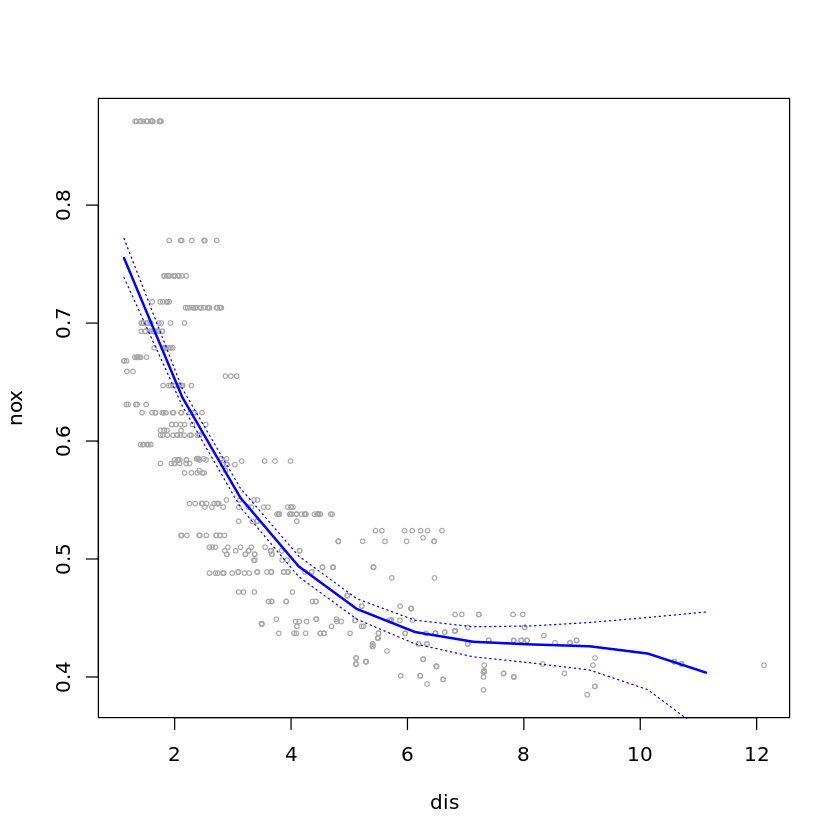

In [7]:
plot(dis, nox, xlim=range(dis), cex=.5, col="darkgrey")
#plot the predictions
lines(dis.grid, preds$fit, lwd=2, col="blue")
#plot the standard error
matlines(dis.grid, se.bands, lwd=1, col="blue", lty=3)

__b.)__ Plot polynomial fits for a range of different polynomial degrees and report the residual sum of squares.

In [8]:
fit.1 = lm(nox~poly(dis, 1), data=Boston)
fit.2 = lm(nox~poly(dis, 2), data=Boston)
fit.3 = lm(nox~poly(dis, 3), data=Boston)
fit.4 = lm(nox~poly(dis, 4), data=Boston)
fit.5 = lm(nox~poly(dis, 5), data=Boston)
fit.6 = lm(nox~poly(dis, 6), data=Boston)
fit.7 = lm(nox~poly(dis, 7), data=Boston)
fit.8 = lm(nox~poly(dis, 8), data=Boston)
fit.9 = lm(nox~poly(dis, 9), data=Boston)
fit.10 = lm(nox~poly(dis, 10), data=Boston)

In [9]:
fit.1.rss = sum(fit.1$residuals ** 2)
fit.2.rss = sum(fit.2$residuals ** 2)
fit.3.rss = sum(fit.3$residuals ** 2)
fit.4.rss = sum(fit.4$residuals ** 2)
fit.5.rss = sum(fit.5$residuals ** 2)
fit.6.rss = sum(fit.6$residuals ** 2)
fit.7.rss = sum(fit.7$residuals ** 2)
fit.8.rss = sum(fit.8$residuals ** 2)
fit.9.rss = sum(fit.9$residuals ** 2)
fit.10.rss = sum(fit.10$residuals ** 2)

In [10]:
print(fit.1.rss)
print(fit.2.rss)
print(fit.3.rss)
print(fit.4.rss)
print(fit.5.rss)
print(fit.6.rss)
print(fit.7.rss)
print(fit.8.rss)
print(fit.9.rss)
print(fit.10.rss)

[1] 2.768563
[1] 2.035262
[1] 1.934107
[1] 1.932981
[1] 1.91529
[1] 1.878257
[1] 1.849484
[1] 1.83563
[1] 1.833331
[1] 1.832171


*I would love to spend some more time learning R syntax and lists and whatnot but I have a midterm tomorrow :)*

It seems that the higher value of polynomial, the better fit the model will be.

In [11]:
fit.100.rss=sum((lm(nox~poly(dis, 17), data=Boston))$residuals**2)
fit.100.rss

[1] 1.777692

I tried going up to polynomial 100 to try to fit everything to see if I would get a super tiny error (0), but it seems that there are only 17 unique points. The error is still smaller with degree 17, but it seems that if we keep increasing degree, we would be overfitting.

__c.)__ Perform cross-validation or another approach to select the optimal degree for the polynomial.

In [12]:
anova(fit.1, fit.2, fit.3, fit.4, fit.5, fit.6, fit.7, fit.8, fit.9, fit.10)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,2.768563,NA,NA,NA,NA
503,2.035262,1,0.733300990,198.1168600,4.359043e-38
502,1.934107,1,0.101155162,27.3292186,2.535399e-07
501,1.932981,1,0.001125380,0.3040453,5.816062e-01
500,1.915290,1,0.017691366,4.7796989,2.926475e-02
499,1.878257,1,0.037032663,10.0051615,1.656919e-03
498,1.849484,1,0.028773684,7.7738227,5.504872e-03
497,1.835630,1,0.013853926,3.7429327,5.360073e-02
496,1.833331,1,0.002298885,0.6210926,4.310188e-01
495,1.832171,1,0.001159681,0.3133124,5.759079e-01


Using ```anova()```, we can see that the p-values for polynomial degree 1 is basically 0, so a linear model (poly degree of 1) is insufficient to describe our data. We can use the same argument for degree of 2 ($e^{-38}$).

If we look at degree 3, we are at $e^{-7}$, which is still pretty small but degree 4 and beyond seems way too big for a p-value. For this, I would pick model 3 with 502 degrees of freedom to be my model.

__d.)__ Use ```bs()``` to fit a regression spline to predict ```nox``` using ```dis```.

In [13]:
library(splines)

[1] 506  14

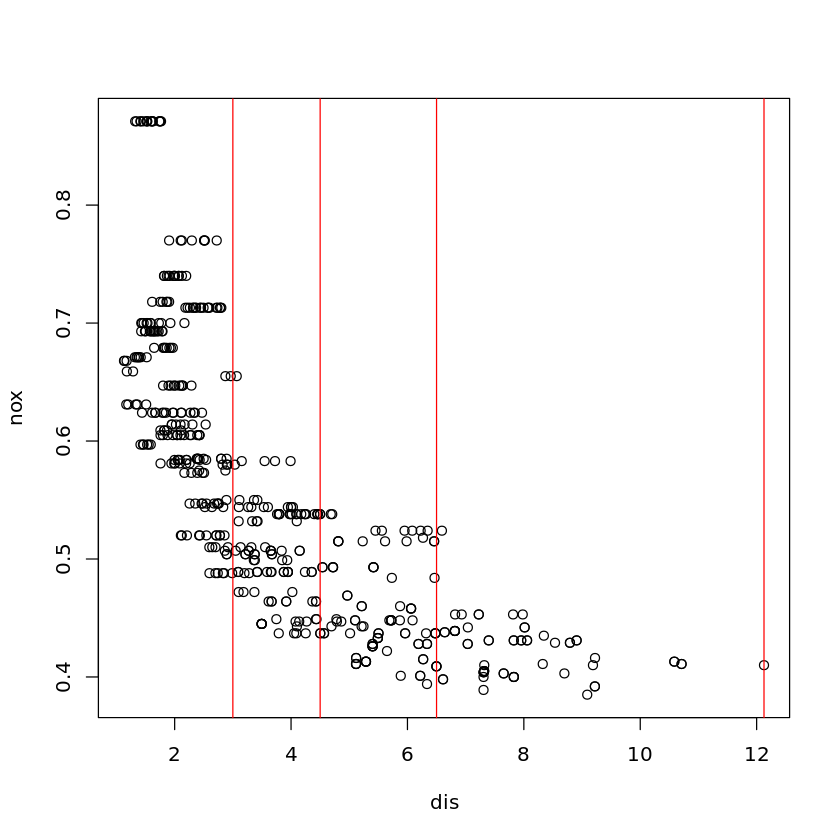

In [14]:
dim(Boston)
plot(dis, nox)
abline(v=3, col="red")
abline(v=4.5, col="red")
abline(v=6.5, col="red")
abline(v=max(dis), col="red")

In [15]:
fit = lm(nox~bs(dis, knots=c(3.5, 4.5, 6.5, max(dis))), data=Boston)
summary(fit)


Call:
lm(formula = nox ~ bs(dis, knots = c(3.5, 4.5, 6.5, max(dis))), 
    data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.132936 -0.038885 -0.008756  0.026170  0.188570 

Coefficients: (1 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                   0.708885   0.015635  45.339
bs(dis, knots = c(3.5, 4.5, 6.5, max(dis)))1  0.009902   0.030896   0.320
bs(dis, knots = c(3.5, 4.5, 6.5, max(dis)))2 -0.222445   0.017271 -12.880
bs(dis, knots = c(3.5, 4.5, 6.5, max(dis)))3 -0.223199   0.022896  -9.748
bs(dis, knots = c(3.5, 4.5, 6.5, max(dis)))4 -0.321135   0.031520 -10.188
bs(dis, knots = c(3.5, 4.5, 6.5, max(dis)))5 -0.277495   0.053522  -5.185
bs(dis, knots = c(3.5, 4.5, 6.5, max(dis)))6 -0.307170   0.055879  -5.497
bs(dis, knots = c(3.5, 4.5, 6.5, max(dis)))7        NA         NA      NA
                                             Pr(>|t|)    
(Intercept)    

I don't actually know what a degree of freedom is, but I'm guessing that it's the degree of polynomial. I picked the knots by eyeballing where similar slopes are in the correlation graph.

Warning message in predict.lm(fit, newdata = list(dis = dis.grid), se = TRUE):
“prediction from a rank-deficient fit may be misleading”

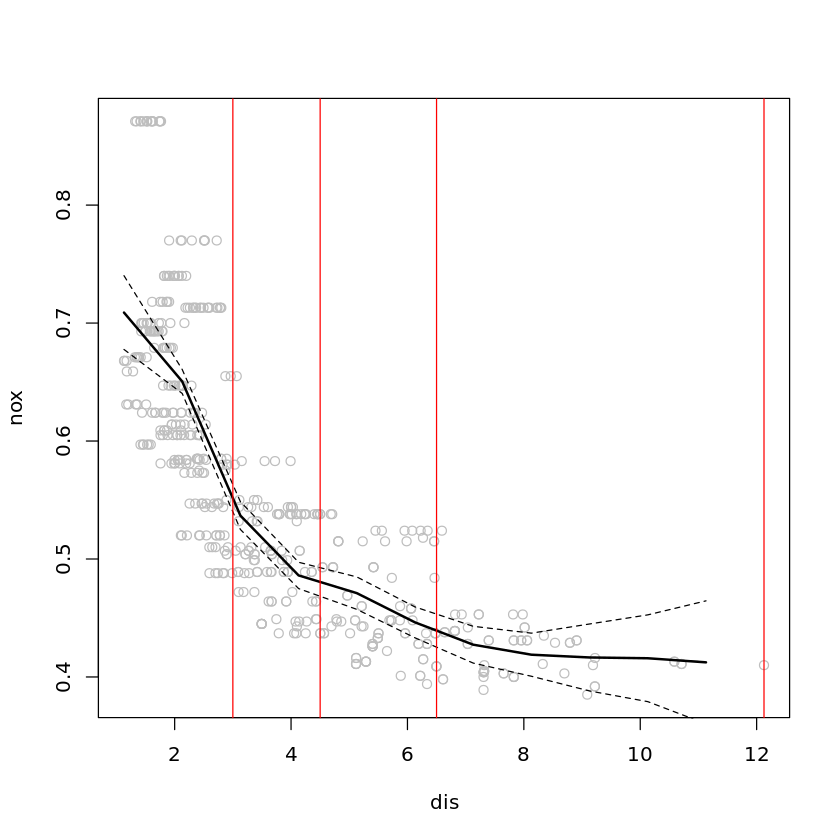

In [16]:
dis.grid = seq(min(dis), max(dis))
pred=predict(fit, newdata=list(dis=dis.grid), se=TRUE)
plot(dis, nox, col="gray")
lines(dis.grid, pred$fit, lwd=2)
lines(dis.grid, pred$fit+2*pred$se, lty="dashed")
lines(dis.grid, pred$fit-2*pred$se, lty="dashed")
abline(v=3, col="red")
abline(v=4.5, col="red")
abline(v=6.5, col="red")
abline(v=max(dis), col="red")

I'm not sure why my model doesn't reach to the end of the ```max(dis)```. I did the same sequence between the min and max of dis, but it isn't working out for me :(

For the next ones, I'm just going to use a sequence for selection of the knots.

In [17]:
fit.6 = lm(nox~bs(dis, knots=seq(min(dis), max(dis), 2)), data=Boston)
fit.8 = lm(nox~bs(dis, knots=seq(min(dis), max(dis), 1.5)), data=Boston)
fit.11 = lm(nox~bs(dis, knots=seq(min(dis), max(dis), 1)), data=Boston)
fit.15 = lm(nox~bs(dis, knots=seq(min(dis), max(dis), .75)), data=Boston)
fit.22 = lm(nox~bs(dis, knots=seq(min(dis), max(dis), .5)), data=Boston)
fit.110 = lm(nox~bs(dis, knots=seq(min(dis), max(dis), .1)), data=Boston)

Warning message in predict.lm(fit.6, newdata = list(dis = dis.grid), se = TRUE):
“prediction from a rank-deficient fit may be misleading”

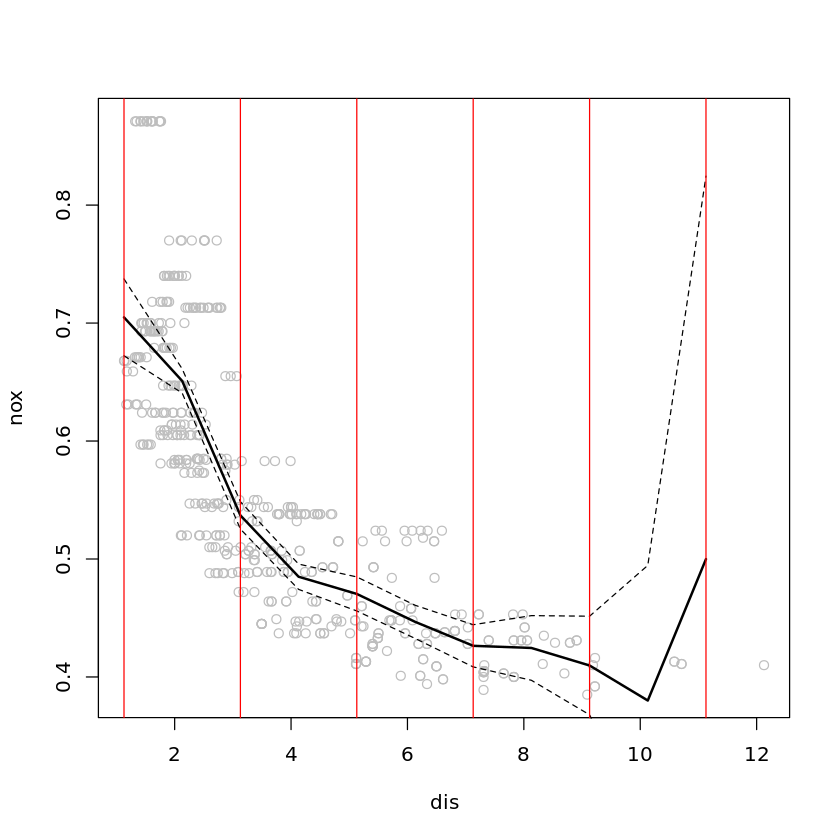

In [18]:
pred=predict(fit.6, newdata=list(dis=dis.grid), se=TRUE)
plot(dis, nox, col="gray")
lines(dis.grid, pred$fit, lwd=2)
lines(dis.grid, pred$fit+2*pred$se, lty="dashed")
lines(dis.grid, pred$fit-2*pred$se, lty="dashed")
for (i in seq(min(dis), max(dis), 2)) {
    abline(v=i, col="red")
}

Warning message in predict.lm(fit.8, newdata = list(dis = dis.grid), se = TRUE):
“prediction from a rank-deficient fit may be misleading”

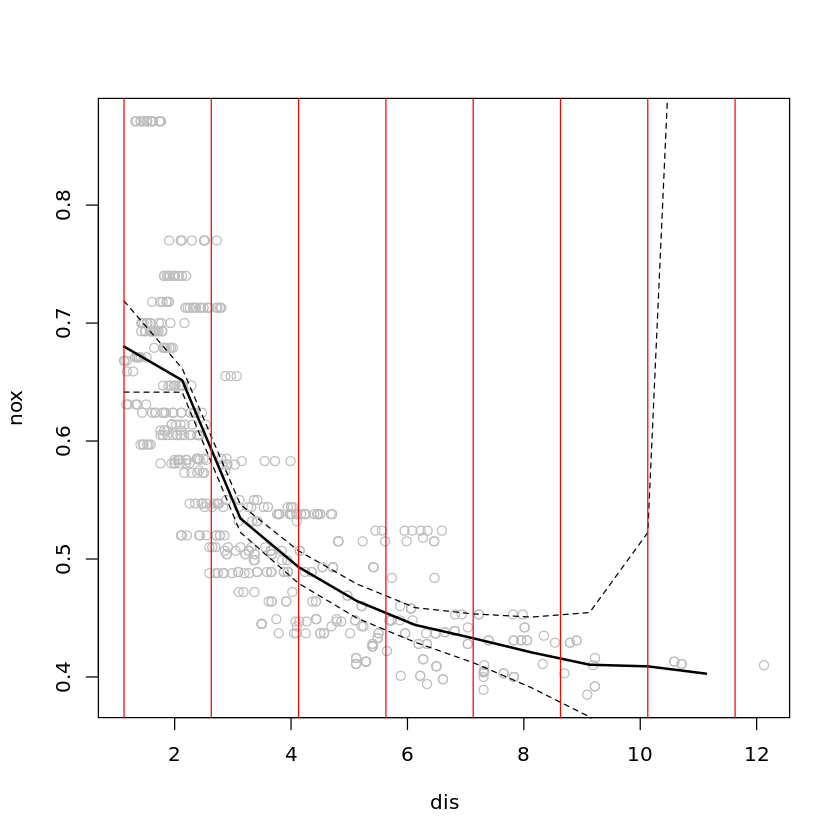

In [19]:
pred=predict(fit.8, newdata=list(dis=dis.grid), se=TRUE)
plot(dis, nox, col="gray")
lines(dis.grid, pred$fit, lwd=2)
lines(dis.grid, pred$fit+2*pred$se, lty="dashed")
lines(dis.grid, pred$fit-2*pred$se, lty="dashed")
for (i in seq(min(dis), max(dis), 1.5)) {
    abline(v=i, col="red")
}

Warning message in predict.lm(fit.15, newdata = list(dis = dis.grid), se = TRUE):
“prediction from a rank-deficient fit may be misleading”

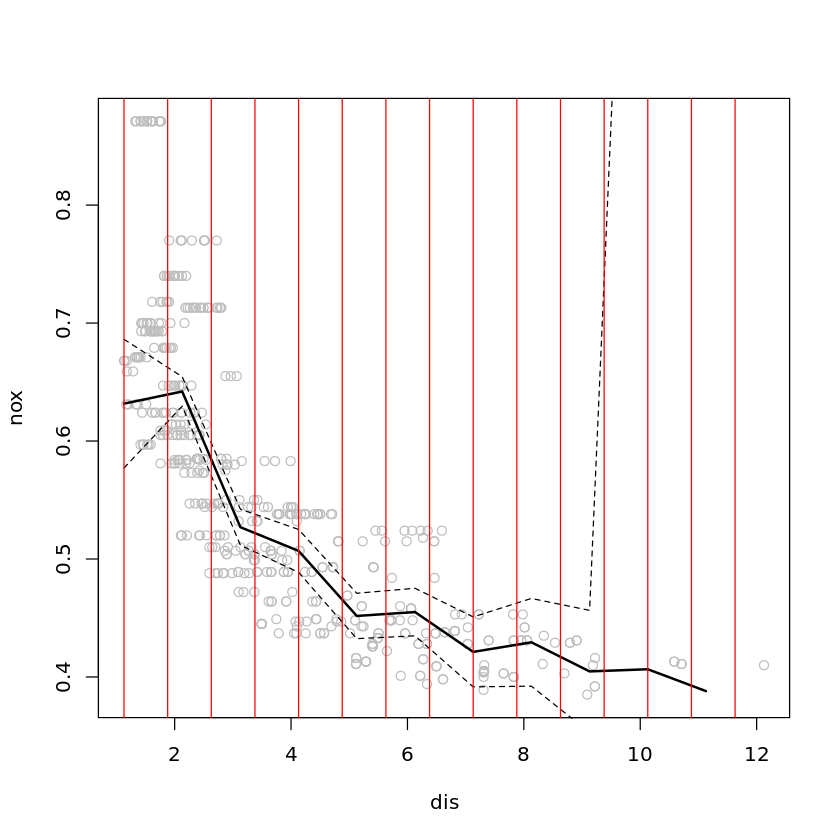

In [20]:
pred=predict(fit.15, newdata=list(dis=dis.grid), se=TRUE)
plot(dis, nox, col="gray")
lines(dis.grid, pred$fit, lwd=2)
lines(dis.grid, pred$fit+2*pred$se, lty="dashed")
lines(dis.grid, pred$fit-2*pred$se, lty="dashed")
for (i in seq(min(dis), max(dis), .75)) {
    abline(v=i, col="red")
}

Warning message in predict.lm(fit.110, newdata = list(dis = dis.grid), se = TRUE):
“prediction from a rank-deficient fit may be misleading”

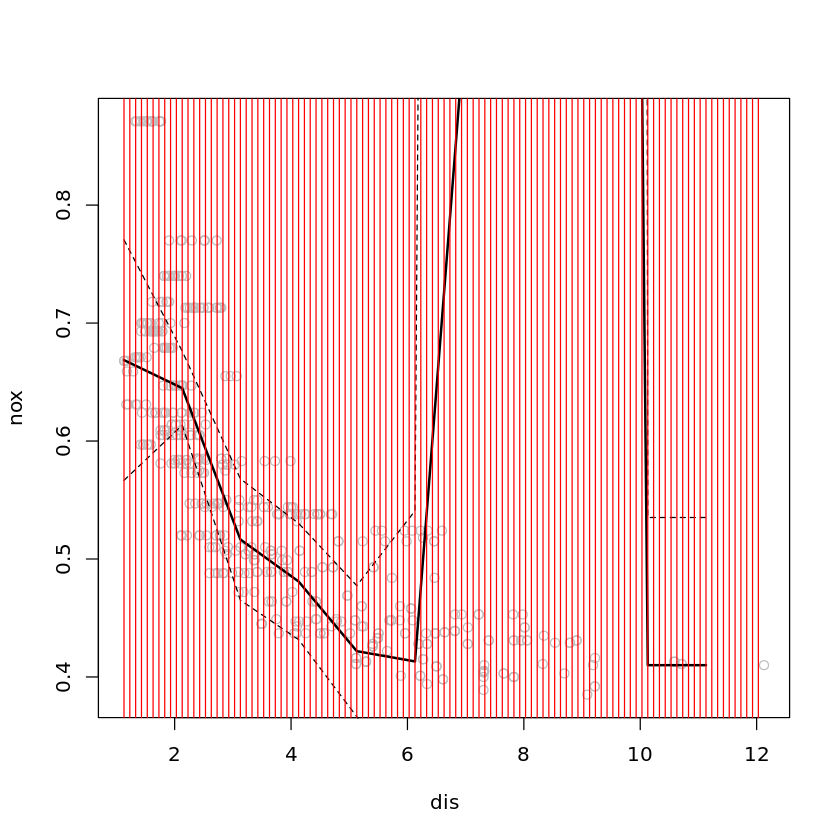

In [21]:
pred=predict(fit.110, newdata=list(dis=dis.grid), se=TRUE)
plot(dis, nox, col="gray")
lines(dis.grid, pred$fit, lwd=2)
lines(dis.grid, pred$fit+2*pred$se, lty="dashed")
lines(dis.grid, pred$fit-2*pred$se, lty="dashed")
for (i in seq(min(dis), max(dis), .1)) {
    abline(v=i, col="red")
}

[1] 506

[1] 505

Warning message in predict.lm(fit.505, newdata = list(dis = dis.grid), se = TRUE):
“prediction from a rank-deficient fit may be misleading”

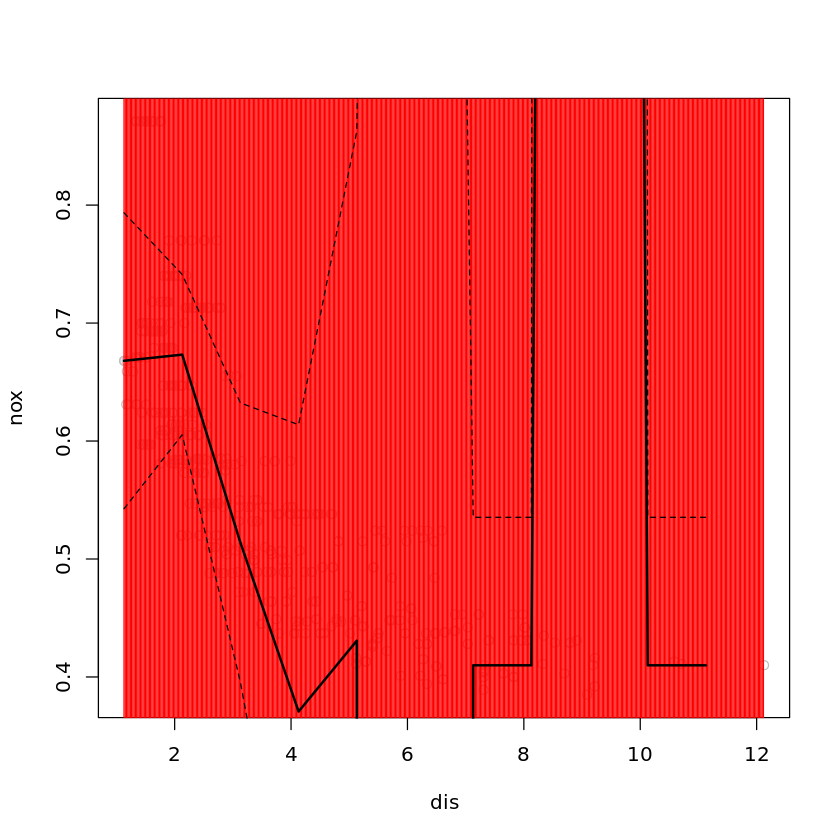

In [22]:
#For fun.
length(dis)
length(seq(min(dis), max(dis), .0218))
fit.505 = lm(nox~bs(dis, knots=seq(min(dis), max(dis), .0218)), data=Boston)
pred=predict(fit.505, newdata=list(dis=dis.grid), se=TRUE)
plot(dis, nox, col="gray")
for (i in seq(min(dis), max(dis), .0218)) {
    abline(v=i, col="red")
}
lines(dis.grid, pred$fit, lwd=2)
lines(dis.grid, pred$fit+2*pred$se, lty="dashed")
lines(dis.grid, pred$fit-2*pred$se, lty="dashed")


I picked random values to do cuts on, so there wasn't a whole lot of structure to the degrees of fredom that I picked. Towards the end, I decided to have some fun to see how wack the regression spline would look like, and it pretty wack. 

In [23]:
anova(fit.6, fit.8, fit.11, fit.15, fit.22, fit.110, fit.505)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
497,1.860362,NA,NA,NA,NA
495,1.842421,2,0.01794065,2.2800654,0.10431907
492,1.820645,3,0.02177629,1.8450229,0.13938986
489,1.785506,3,0.03513900,2.9771948,0.03209471
483,1.772612,6,0.01289449,0.5462508,0.77271300
420,1.645535,63,0.12707634,0.5126999,0.99899543
260,1.022902,160,0.62263293,0.9891251,0.52612624


Looks like the best model to pick (from the ones that I generated) would be the one with 15 knots/degrees of freedom.